<a href="https://colab.research.google.com/github/Catherinelapir/Final-year-project-image-segmentation-model/blob/main/Final_year_project_cathy_mobileNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#connecting the drive to google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#importing the required python libraries

In [ ]:
import os, keras
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.backend as K
import natsort

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array, array_to_img

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, Sequential

#different image directories

In [ ]:
input_dir1 = "/content/drive/MyDrive/image_copy/image_copy1/"
combined_mask_dir1="/content/drive/MyDrive/mask_copy/content/combined_masks/"

input_dir2 = "/content/drive/MyDrive/image_copy/image_copy1_augmented_vertically/"
combined_mask_dir2 = "/content/drive/MyDrive/mask_copy/content/combined_masks_augmented_vertically/"

input_dir4 = "/content/drive/MyDrive/image_copy/augmented_image_rotated/"
combined_mask_dir4 = "/content/drive/MyDrive/mask_copy/content/augmented_rotated_masks/"

input_dir5 = "/content/drive/MyDrive/image_copy/augmented_image_zoom/"
combined_mask_dir5 = "/content/drive/MyDrive/mask_copy/content/augmented_mask_zoomed/"

input_dir6 = "/content/drive/MyDrive/image_copy/augmented_image_shift_width/"
combined_mask_dir6 = "/content/drive/MyDrive/mask_copy/content/augmented_mask_width_shifted/"


In [ ]:
test_dir_img = "/content/drive/MyDrive/image_copy/image_test/"
test_dir_mask = "/content/drive/MyDrive/mask_copy/content/mask_test/"

In [ ]:
input_test_img_paths = natsort.natsorted(
    [
        os.path.join(test_dir_img, fname)
        for fname in os.listdir(test_dir_img)
        if fname.endswith(".jpg")
    ]
)

input_test_img_paths[16:20]

['/content/drive/MyDrive/image_copy/image_test/image_25.jpg',
 '/content/drive/MyDrive/image_copy/image_test/image_26.jpg',
 '/content/drive/MyDrive/image_copy/image_test/image_27.jpg',
 '/content/drive/MyDrive/image_copy/image_test/image_28.jpg']

In [ ]:
input_test_mask_paths = natsort.natsorted(
    [
        os.path.join(test_dir_mask, fname)
        for fname in os.listdir(test_dir_mask)
        if fname.endswith(".jpg")
    ]
)

input_test_mask_paths[16:20]

['/content/drive/MyDrive/mask_copy/content/mask_test/mask_25.jpg',
 '/content/drive/MyDrive/mask_copy/content/mask_test/mask_26.jpg',
 '/content/drive/MyDrive/mask_copy/content/mask_test/mask_27.jpg',
 '/content/drive/MyDrive/mask_copy/content/mask_test/mask_28.jpg']

In [ ]:
input_img_paths1 = natsort.natsorted(
    [
        os.path.join(input_dir1, fname)
        for fname in os.listdir(input_dir1)
        if fname.endswith(".jpg")
    ]
)

input_img_paths1[16:20]

['/content/drive/MyDrive/image_copy/image_copy1/image_40.jpg',
 '/content/drive/MyDrive/image_copy/image_copy1/image_41.jpg',
 '/content/drive/MyDrive/image_copy/image_copy1/image_42.jpg',
 '/content/drive/MyDrive/image_copy/image_copy1/image_43.jpg']

In [ ]:
combined_mask_paths1 =natsort.natsorted(
    [
        os.path.join(combined_mask_dir1, fname)
        for fname in os.listdir(combined_mask_dir1)
        if fname.endswith(".jpg")
    ]
)

combined_mask_paths1[16:20]

['/content/drive/MyDrive/mask_copy/content/combined_masks/mask_40.jpg',
 '/content/drive/MyDrive/mask_copy/content/combined_masks/mask_41.jpg',
 '/content/drive/MyDrive/mask_copy/content/combined_masks/mask_42.jpg',
 '/content/drive/MyDrive/mask_copy/content/combined_masks/mask_43.jpg']

In [ ]:
input_img_paths2 = natsort.natsorted(
    [
        os.path.join(input_dir2, fname)
        for fname in os.listdir(input_dir2)
        if fname.endswith(".jpg")
    ]
)

input_img_paths2[16:20]

['/content/drive/MyDrive/image_copy/image_copy1_augmented_vertically/image_40.jpg',
 '/content/drive/MyDrive/image_copy/image_copy1_augmented_vertically/image_41.jpg',
 '/content/drive/MyDrive/image_copy/image_copy1_augmented_vertically/image_42.jpg',
 '/content/drive/MyDrive/image_copy/image_copy1_augmented_vertically/image_43.jpg']

In [ ]:
combined_mask_paths2 = natsort.natsorted(
    [
        os.path.join(combined_mask_dir2, fname)
        for fname in os.listdir(combined_mask_dir2)
        if fname.endswith(".jpg")
    ]
)

combined_mask_paths2[16:20]

['/content/drive/MyDrive/mask_copy/content/combined_masks_augmented_vertically/mask_40.jpg',
 '/content/drive/MyDrive/mask_copy/content/combined_masks_augmented_vertically/mask_41.jpg',
 '/content/drive/MyDrive/mask_copy/content/combined_masks_augmented_vertically/mask_42.jpg',
 '/content/drive/MyDrive/mask_copy/content/combined_masks_augmented_vertically/mask_43.jpg']

In [ ]:
input_img_paths4 = natsort.natsorted(
    [
        os.path.join(input_dir4, fname)
        for fname in os.listdir(input_dir4)
        if fname.endswith(".jpg")
    ]
)

input_img_paths4[16:20]

['/content/drive/MyDrive/image_copy/augmented_image_rotated/image_40.jpg',
 '/content/drive/MyDrive/image_copy/augmented_image_rotated/image_41.jpg',
 '/content/drive/MyDrive/image_copy/augmented_image_rotated/image_42.jpg',
 '/content/drive/MyDrive/image_copy/augmented_image_rotated/image_43.jpg']

In [ ]:
combined_mask_paths4 = natsort.natsorted(
    [
        os.path.join(combined_mask_dir4, fname)
        for fname in os.listdir(combined_mask_dir4)
        if fname.endswith(".jpg")
    ]
)

combined_mask_paths4[16:20]

['/content/drive/MyDrive/mask_copy/content/augmented_rotated_masks/mask_40.jpg',
 '/content/drive/MyDrive/mask_copy/content/augmented_rotated_masks/mask_41.jpg',
 '/content/drive/MyDrive/mask_copy/content/augmented_rotated_masks/mask_42.jpg',
 '/content/drive/MyDrive/mask_copy/content/augmented_rotated_masks/mask_43.jpg']

In [ ]:
input_img_paths5 = natsort.natsorted(
    [
        os.path.join(input_dir5, fname)
        for fname in os.listdir(input_dir5)
        if fname.endswith(".jpg")
    ]
)

input_img_paths5[16:20]

['/content/drive/MyDrive/image_copy/augmented_image_zoom/image_40.jpg',
 '/content/drive/MyDrive/image_copy/augmented_image_zoom/image_41.jpg',
 '/content/drive/MyDrive/image_copy/augmented_image_zoom/image_42.jpg',
 '/content/drive/MyDrive/image_copy/augmented_image_zoom/image_43.jpg']

In [ ]:
combined_mask_paths5 = natsort.natsorted(
    [
        os.path.join(combined_mask_dir5, fname)
        for fname in os.listdir(combined_mask_dir5)
        if fname.endswith(".jpg")
    ]
)

combined_mask_paths5[16:20]

['/content/drive/MyDrive/mask_copy/content/augmented_mask_zoomed/mask_40.jpg',
 '/content/drive/MyDrive/mask_copy/content/augmented_mask_zoomed/mask_41.jpg',
 '/content/drive/MyDrive/mask_copy/content/augmented_mask_zoomed/mask_42.jpg',
 '/content/drive/MyDrive/mask_copy/content/augmented_mask_zoomed/mask_43.jpg']

In [ ]:
input_img_paths6 = natsort.natsorted(
    [
        os.path.join(input_dir6, fname)
        for fname in os.listdir(input_dir6)
        if fname.endswith(".jpg")
    ]
)

input_img_paths6[16:20]

['/content/drive/MyDrive/image_copy/augmented_image_shift_width/image_40.jpg',
 '/content/drive/MyDrive/image_copy/augmented_image_shift_width/image_41.jpg',
 '/content/drive/MyDrive/image_copy/augmented_image_shift_width/image_42.jpg',
 '/content/drive/MyDrive/image_copy/augmented_image_shift_width/image_43.jpg']

In [ ]:
combined_mask_paths6 = natsort.natsorted(
    [
        os.path.join(combined_mask_dir6, fname)
        for fname in os.listdir(combined_mask_dir6)
        if fname.endswith(".jpg")
    ]
)

combined_mask_paths6[16:20]

['/content/drive/MyDrive/mask_copy/content/augmented_mask_width_shifted/mask_40.jpg',
 '/content/drive/MyDrive/mask_copy/content/augmented_mask_width_shifted/mask_41.jpg',
 '/content/drive/MyDrive/mask_copy/content/augmented_mask_width_shifted/mask_42.jpg',
 '/content/drive/MyDrive/mask_copy/content/augmented_mask_width_shifted/mask_43.jpg']

In [ ]:
combined_images = input_img_paths1  + input_img_paths2  + input_img_paths4 + input_img_paths5 + input_img_paths6
combined_masks = combined_mask_paths1  + combined_mask_paths2 + combined_mask_paths4 + combined_mask_paths5 + combined_mask_paths6 
print(len(combined_masks))
print(len(combined_images))

1685
1685


In [ ]:
combined_images[600:606]

['/content/drive/MyDrive/image_copy/image_copy1_augmented_vertically/image_303.jpg',
 '/content/drive/MyDrive/image_copy/image_copy1_augmented_vertically/image_304.jpg',
 '/content/drive/MyDrive/image_copy/image_copy1_augmented_vertically/image_305.jpg',
 '/content/drive/MyDrive/image_copy/image_copy1_augmented_vertically/image_306.jpg',
 '/content/drive/MyDrive/image_copy/image_copy1_augmented_vertically/image_307.jpg',
 '/content/drive/MyDrive/image_copy/image_copy1_augmented_vertically/image_308.jpg']

In [ ]:
combined_masks[600:606]

['/content/drive/MyDrive/mask_copy/content/combined_masks_augmented_vertically/mask_303.jpg',
 '/content/drive/MyDrive/mask_copy/content/combined_masks_augmented_vertically/mask_304.jpg',
 '/content/drive/MyDrive/mask_copy/content/combined_masks_augmented_vertically/mask_305.jpg',
 '/content/drive/MyDrive/mask_copy/content/combined_masks_augmented_vertically/mask_306.jpg',
 '/content/drive/MyDrive/mask_copy/content/combined_masks_augmented_vertically/mask_307.jpg',
 '/content/drive/MyDrive/mask_copy/content/combined_masks_augmented_vertically/mask_308.jpg']

#combining All the images directories in one dataframe

In [ ]:
image_and_mask = {'image_path':combined_images, 'mask_path':combined_masks}
df = pd.DataFrame(image_and_mask)
df

,image_path,mask_path
0,/content/drive/MyDrive/image_copy/image_copy1/...,/content/drive/MyDrive/mask_copy/content/combi...
1,/content/drive/MyDrive/image_copy/image_copy1/...,/content/drive/MyDrive/mask_copy/content/combi...
2,/content/drive/MyDrive/image_copy/image_copy1/...,/content/drive/MyDrive/mask_copy/content/combi...
3,/content/drive/MyDrive/image_copy/image_copy1/...,/content/drive/MyDrive/mask_copy/content/combi...
4,/content/drive/MyDrive/image_copy/image_copy1/...,/content/drive/MyDrive/mask_copy/content/combi...
...,...,...
1680,/content/drive/MyDrive/image_copy/augmented_im...,/content/drive/MyDrive/mask_copy/content/augme...
1681,/content/drive/MyDrive/image_copy/augmented_im...,/content/drive/MyDrive/mask_copy/content/augme...
1682,/content/drive/MyDrive/image_copy/augmented_im...,/content/drive/MyDrive/mask_copy/content/augme...
1683,/content/drive/MyDrive/image_copy/augmented_im...,/content/drive/MyDrive/mask_copy/content/augme...


In [ ]:
image_and_mask = {'image_path':input_test_img_paths, 'mask_path':input_test_mask_paths}
df1 = pd.DataFrame(image_and_mask)
df1

,image_path,mask_path
0,/content/drive/MyDrive/image_copy/image_test/i...,/content/drive/MyDrive/mask_copy/content/mask_...
1,/content/drive/MyDrive/image_copy/image_test/i...,/content/drive/MyDrive/mask_copy/content/mask_...
2,/content/drive/MyDrive/image_copy/image_test/i...,/content/drive/MyDrive/mask_copy/content/mask_...
3,/content/drive/MyDrive/image_copy/image_test/i...,/content/drive/MyDrive/mask_copy/content/mask_...
4,/content/drive/MyDrive/image_copy/image_test/i...,/content/drive/MyDrive/mask_copy/content/mask_...
5,/content/drive/MyDrive/image_copy/image_test/i...,/content/drive/MyDrive/mask_copy/content/mask_...
6,/content/drive/MyDrive/image_copy/image_test/i...,/content/drive/MyDrive/mask_copy/content/mask_...
7,/content/drive/MyDrive/image_copy/image_test/i...,/content/drive/MyDrive/mask_copy/content/mask_...
8,/content/drive/MyDrive/image_copy/image_test/i...,/content/drive/MyDrive/mask_copy/content/mask_...
9,/content/drive/MyDrive/image_copy/image_test/i...,/content/drive/MyDrive/mask_copy/content/mask_...


In [ ]:
IMG_SIZE = [512, 512]

def preprocessing(img_path, mak_path):
    car_img = tf.io.read_file(img_path) 
    car_img = tf.image.decode_jpeg(car_img, channels=3)
    car_img = tf.image.resize(car_img, IMG_SIZE)
    car_img = tf.cast(car_img, tf.float32) / 255.0
    
    mask_img = tf.io.read_file(mak_path)
    mask_img = tf.image.decode_jpeg(mask_img, channels=3)
    mask_img = tf.image.resize(mask_img, IMG_SIZE)
    mask_img = mask_img[:,:,:1]    
    mask_img = tf.math.sign(mask_img)

    return car_img, mask_img

def create_dataset(df, train = False):
    if not train:
        ds = tf.data.Dataset.from_tensor_slices((df["image_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
    else:
        ds = tf.data.Dataset.from_tensor_slices((df["image_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
        
        
    return ds

In [ ]:
train_df, valid_df = train_test_split(df, random_state=42, test_size=.3)

In [ ]:
print(len(train_df))
print(len(valid_df))

1179
506


In [ ]:
train= create_dataset(df, train = True)
valid = create_dataset(df)
test = create_dataset(df1)

In [ ]:
TRAIN_LENGTH = len(df)
BATCH_SIZE = 32
BUFFER_SIZE = 1000

In [ ]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
valid_dataset = valid.batch(BATCH_SIZE)
test_dataset = test.batch(BATCH_SIZE)

In [ ]:
print(train_dataset)
print(valid_dataset)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 512, 512, 1), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 512, 512, 1), dtype=tf.float32, name=None))>


(32, 512, 512, 3)
(32, 512, 512, 1)


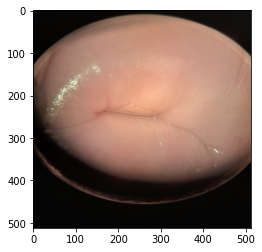

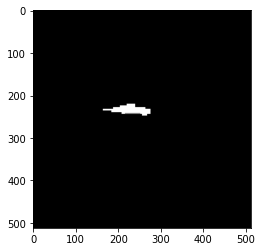

In [ ]:
import random
ind = random.randint(0, 16)
for img, msk in valid_dataset:
    print(img.shape)
    print(msk.shape)
    plt.imshow(img[ind])
    plt.show()
    
    plt.imshow(msk[ind,:,:, 0], cmap='gray')
    plt.show()
    break

#model2 using unet and mobilenet

9420800/9406464 [==============================] - 2s 0us/step


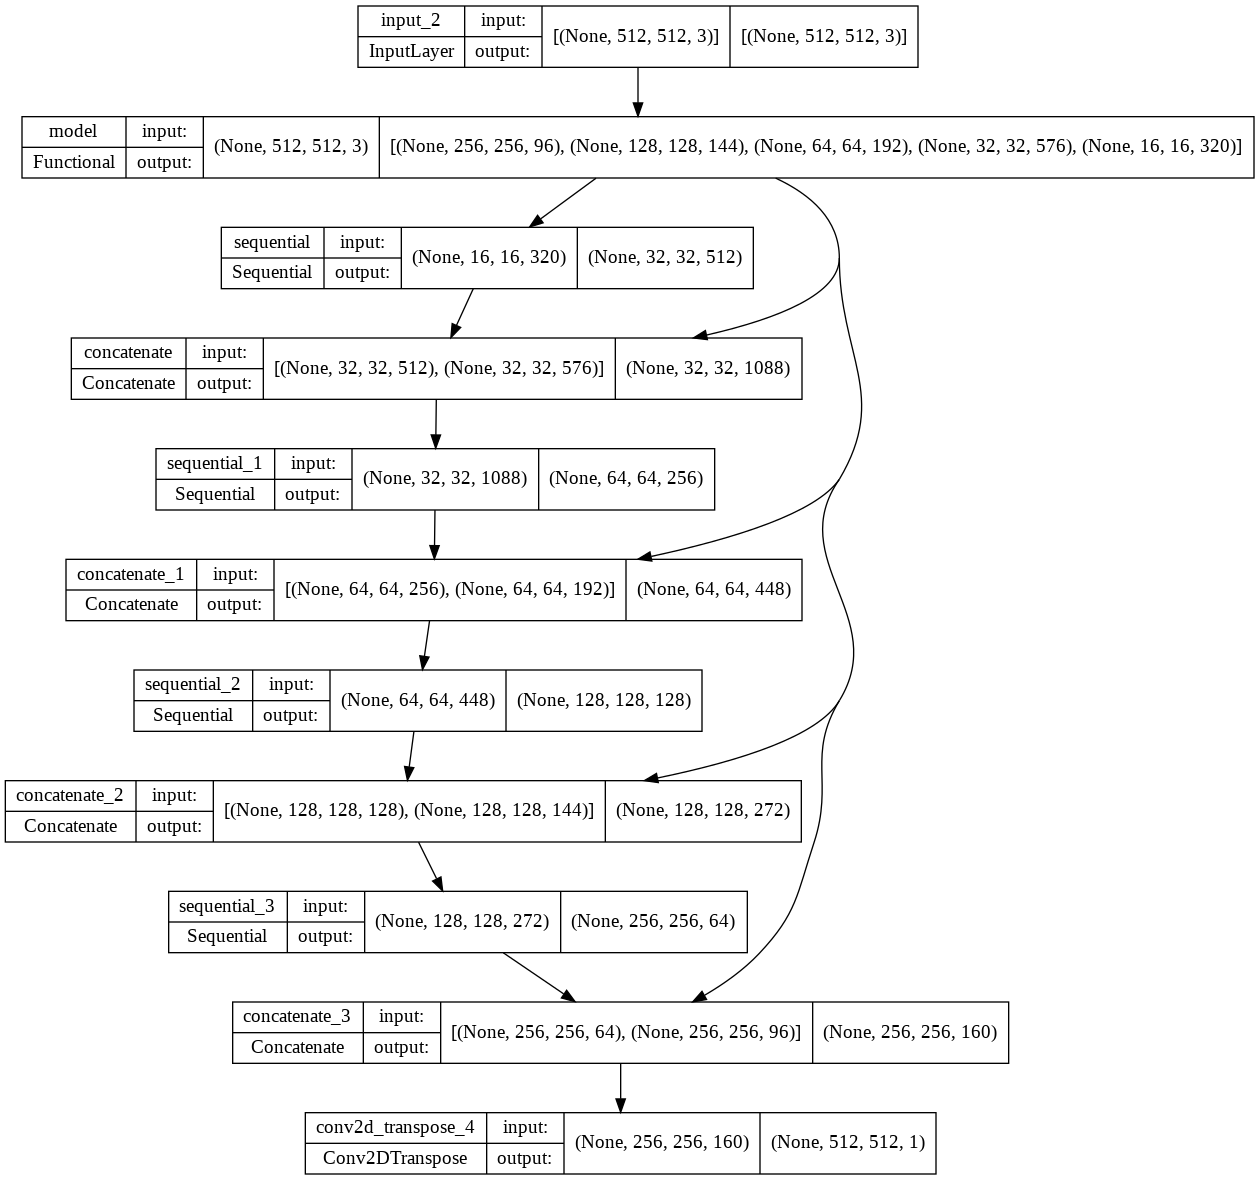

In [ ]:
input_sahpe = (512, 512, 3)
base_model = tf.keras.applications.MobileNetV2(input_shape=[512, 512, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)
down_stack.trainable = False


# from https://github.com/tensorflow/examples/blob/master/tensorflow_examples/models/pix2pix/pix2pix.py
def upsample(filters, size, norm_type='batchnorm', apply_dropout=True):
    initializer = tf.random_normal_initializer(0., 0.02)
    
    result = tf.keras.Sequential()
    result.add(
      tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                      padding='same',
                                      kernel_initializer=initializer,
                                      use_bias=False))

    if norm_type.lower() == 'batchnorm':
        result.add(tf.keras.layers.BatchNormalization())
    elif norm_type.lower() == 'instancenorm':
        result.add(InstanceNormalization())

    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.65))

        result.add(tf.keras.layers.ReLU())

    return result
   
up_stack = [
    upsample(512, 3),  # 4x4 -> 8x8
    upsample(256, 3),  # 8x8 -> 16x16
    upsample(128, 3),  # 16x16 -> 32x32
    upsample(64, 3),   # 32x32 -> 64x64
]



def unet_model(output_channels):
    inputs = tf.keras.layers.Input(shape=[512, 512, 3])

    # Downsampling through the model
    skips = down_stack(inputs)
    x = skips[-1]
    skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

  # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
      output_channels, 3, strides=2, activation='sigmoid',
      padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

import keras.backend as K


def IoU(y_true,y_pred):
  smooth= 1e-5
  y_true_f = float (K.flatten(y_true))
  y_pred_f = float (K.flatten(y_pred))
  intersection = K.sum(y_true_f*y_pred_f)
  result = (intersection + smooth)/(K.sum(y_true_f)+K.sum(y_pred_f)-intersection+ smooth)
  return result
def IoU_Loss(y_true,y_pred):
    smooth= 1e-5
    iou_loss = (1 - IoU(y_true,y_pred))
    return iou_loss
def get_config(self):
    config = super(IoU_Loss, self).get_config()
    config.update({'IoU_Loss': self.IoU_Loss})
    return config

model2 = unet_model(1)

model2.compile(optimizer='adam', 
              loss=IoU_Loss,
               metrics=[IoU,'binary_accuracy'])



tf.keras.utils.plot_model(model2, show_shapes=True)

#model2 VGG16+UNET

In [ ]:
# from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Input, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras.applications import VGG16
# from keras.layers import concatenate
# from keras.layers.convolutional import Conv2DTranspose
# from keras import backend as K

In [ ]:
# def conv_block(inputs, num_filters):
#   x = Conv2D(num_filters, 3, padding="same")(inputs)
#   x = BatchNormalization()(x)
#   x = Activation("relu")(x)
#   x= Dropout(0.25)(x)

#   x = Conv2D(num_filters, 3, padding="same")(x)
#   x = BatchNormalization()(x)
#   x = Activation("relu")(x)

#   return x

In [ ]:
# # encoder connection
# def decoder_block(inputs, skip_features, num_filters):
#     x = Conv2DTranspose(num_filters, (2,2), strides=2, padding="same")(inputs)
#     x = concatenate([x, skip_features])
#     x = conv_block(x, num_filters)
#     return x

In [ ]:
# # building the pretrained model
# def build_vgg16_unet(input_shape):
#   inputs= Input(input_shape)
#   vgg16 = VGG16(include_top=False, weights= None, input_tensor=inputs, input_shape = [256, 256, 3], pooling = 'max' )

  
# #   skip connection
#   s1 = vgg16.get_layer("block1_conv2").output   #256
#   s2 = vgg16.get_layer("block2_conv2").output   #128
#   s3 = vgg16.get_layer("block3_conv3").output   #64
#   s4 = vgg16.get_layer("block4_conv3").output   #32
# #   bridge  layer

#   b1 = vgg16.get_layer("block5_conv3").output   #16
# #   decoder block
#   d1 = decoder_block(b1, s4, 512)#32
#   d2 = decoder_block(d1, s3, 256)#64
#   d3 = decoder_block(d2, s2, 128)#128
#   d4 = decoder_block(d3, s1, 64)#256
#   outputs = Conv2D(1,1, padding="same", activation="sigmoid")(d4)
#   model = Model(inputs,outputs,name='VGG16_Unet')
#   return model
  
# input_shape = (256, 256, 3)
# model3 = build_vgg16_unet(input_shape)
# model3.summary()

In [ ]:
# import keras.backend as K

# # from https://www.kaggle.com/kmader/vgg16-u-net-on-carvana

# def dice_coef(y_true, y_pred):
#     smooth = 1e-5
#     y_true_f = float(K.flatten(y_true))
#     y_pred_f = float(K.flatten(y_pred))
#     intersection = K.sum(y_true_f * y_pred_f)
#     return (2.0 * intersection + smooth)/(K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# def dice_loss(y_true,y_pred):
#     smooth = 1e-5
#     return (1-dice_coef(y_true,y_pred))

# def IoU(y_true,y_pred):
#   smooth= 1e-5
#   y_true_f = float (K.flatten(y_true))
#   y_pred_f = float (K.flatten(y_pred))
#   intersection = K.sum(y_true_f*y_pred_f)
#   result = (intersection + smooth)/(K.sum(y_true_f)+K.sum(y_pred_f)-intersection+ smooth)
#   return result
# def IoU_Loss(y_true,y_pred):
#     smooth= 1e-5
#     return (1 - IoU(y_true,y_pred))


# # model.compile(optimizer='adam', loss= [IoU_Loss],metrics=[IoU])

In [ ]:
# model3.compile(optimizer= "Adam",
#             #   loss = dice_loss,
#               loss= IoU_Loss,
#               metrics=[dice_coef, IoU,'binary_accuracy'])

# # tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 158 kB 68.3 MB/s 
     |████████████████████████████████| 181 kB 56.3 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 157 kB 72.6 MB/s 
     |████████████████████████████████| 157 kB 67.9 MB/s 
     |████████████████████████████████| 157 kB 41.2 MB/s 
     |████████████████████████████████| 157 kB 74.0 MB/s 
     |████████████████████████████████| 157 kB 76.3 MB/s 
     |████████████████████████████████| 157 kB 60.4 MB/s 
     |████████████████████████████████| 157 kB 76.9 MB/s 
     |████████████████████████████████| 156 kB 76.1 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=978835f185068de7a0b7b02037dff5deefb12de8bdf1d158775193174964b2f3
  Stored in directory: /root/.cache/pip/wheels/3e/31/

In [ ]:
import wandb
import tensorflow as tf

In [ ]:
# # Log in to your W&B account
# wandb.login()

In [ ]:
# config = {
#   "Backbone": 'Base_line_1',
#   "Con2dtranspose_init": 'he_normal',
#   "Decoder_block_type": "Conv2DTranspose",
#   "decoder_filters":(512,256,128,64,32),
#   'batch_norm': True,
#   "Activation": 'relu',
#   "batch_size": 1, 
#   "verbose": 1,
#   "initial_epoch": 0, 
#   "epochs": 100,
#   "shuffle": True,
#   "Dropout": 0.25
# }
# wandb.init(config = config, project="164", entity="claire_nyaketcho_work")
# config = wandb.config

In [ ]:
# from wandb.keras import WandbCallback
# callbacks = WandbCallback(
                                
#                                  loss = dice_loss,
                               
#                                 log_weights=True,
#                                 log_evaluation=True)

In [ ]:
EPOCHS = 300
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

model_history = model2.fit(train_dataset, 
                          epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_data=valid_dataset
                          
                          )

In [ ]:
plt.plot(model_history.history['loss'], color='b', label="Training loss")
plt.plot(model_history.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

In [ ]:
plt.plot(model_history.history['IoU'], color='b', label="Training dice coef")
plt.plot(model_history.history['val_IoU'], color='r',label="Validation dice coef")
# plt.legend(loc='best', shadow=True)
plt.legend()
plt.show()

In [ ]:
model2.evaluate(valid_dataset)

In [ ]:
model2.save('my_model1.h5')

In [ ]:
model2.evaluate(test_dataset)

In [ ]:
from keras.saving import saved_model
from keras.models import load_model

saved_model = tf.keras.models.load_model('my_model1 (2).h5', compile = False)
saved_model.compile(optimizer='adam', 
              loss=IoU_Loss,
               metrics=[IoU,'binary_accuracy'])

In [ ]:
saved_model.evaluate(valid_dataset)

In [ ]:
import random
# ind = random.randint(0,32)
for img, msk in test_dataset:
    for i in range(img.shape[0]):
        plt.figure(figsize=(15, 15))
        title = ['Input Image', 'True Mask', 'Predicted Mask']
        plt.subplot(1, 3, 1)
        plt.title(title[0])
        plt.imshow(img[i])

        plt.subplot(1, 3, 2)
        plt.title(title[1])
        plt.imshow(msk[i,:,:,0], cmap='gray')


        pred = saved_model.predict(tf.expand_dims(img[i], axis=0))
        plt.subplot(1, 3, 3)
        plt.imshow(pred[0,:,:,0], cmap='gray')
        plt.title(title[2])

        plt.axis('off')
        plt.show()
    break

    
    